In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import datasets
from sklearn.preprocessing import normalize
import pylab
import seaborn as sns
from matplotlib import pyplot as plt

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

palette=sns.color_palette("magma", 10)
scaler = StandardScaler()

from tsne import *

## Helper fuctions

In [3]:
def plot_tsne(x1,x2, hue='hue', legend = "full", palette = palette):
    sns.set(rc={'figure.figsize':(7,7)})
    fig = sns.scatterplot(x1, x2,hue = hue,legend = "full",palette = palette) # don't use edges
    plt.show()

In [4]:
def k_means(Low_dimension_data):
    scaled_features_kmeans = scaler.fit_transform(Low_dimension_data)
    kmeans = KMeans(init="random",n_clusters=10,n_init=10,max_iter=1000,random_state=42)
    kmeans.fit(scaled_features_kmeans)
    
    # The lowest SSE value
    SSE = kmeans.inertia_
    print(f"The SSE for T-sne is :{kmeans.inertia_}")
    
    # Final locations of the centroid
    centres = kmeans.cluster_centers_
    
    return SSE, centres

In [5]:
def pca(high_dimesion_data):
    #find the co-variance matrix which is : A^T * A
    sample_data = high_dimesion_data
    # matrix multiplication using numpy
    covar_matrix = np.matmul(sample_data.T , sample_data)
    # this code generates only the top 2 (782 and 783)(index) eigenvalues.
    _, vectors = eigh(covar_matrix, eigvals=(62,63))
    
    return np.matmul(vectors.T, sample_data.T).T

## Start T-sne 

In [6]:
X, y = datasets.load_digits(return_X_y=True) #np.shape(X) = (1797, 64)
#Scale the data
X_scaled = scaler.fit_transform(X)

In [7]:
res_tsne = tsne(X_scaled, T=400, l=200)

Sigmas: [1.24439352 1.72778655 2.20673966 ... 1.85226909 1.88577313 2.18945794]
Iteration 1: error 3.0693
Iteration 51: error 1.5957
Iteration 101: error 1.225
Iteration 151: error 1.0895
Iteration 201: error 1.0145
Iteration 251: error 0.9646
Iteration 301: error 0.8906
Iteration 351: error 0.8457


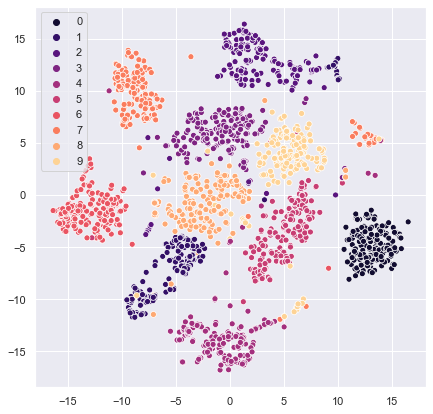

In [8]:
plot_tsne(res_tsne[:, 0], res_tsne[:, 1], hue = y)

In [9]:
error_tsne,centres_tsne = k_means(res_tsne)

The SSE for T-sne is :256.11098245387694


In [ ]:
#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well 
#a data point fits into its assigned cluster based on two factors:
    #How close the data point is to other points in the cluster
    #How far away the data point is from points in other clusters
#Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.


# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
print(f"The siluete for K-means is: {kmeans_silhouette}")

# PCA

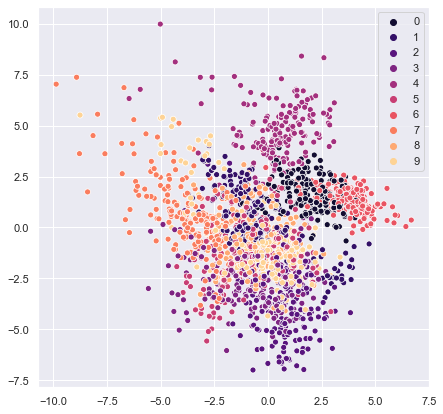

In [10]:
#Apply PCA to our data
res_pca = pca(X_scaled)

#Plot
plot_tsne(res_pca[:, 0], res_pca[:, 1], hue = y)

In [11]:
error_pca, centres_pca = k_means(res_pca)

The SSE for T-sne is :433.55428448450635


## Comparitions

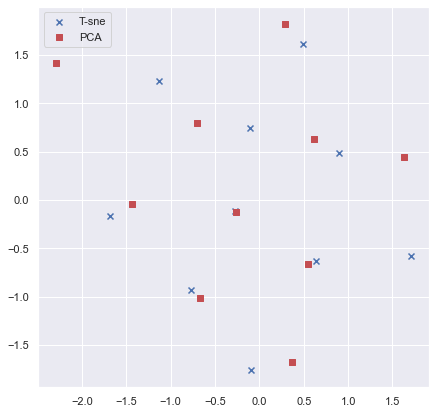

In [12]:
#Compare the centres
plt.scatter(centres_tsne[:,0],centres_tsne[:,1], c='b', marker='x', label='T-sne')
plt.scatter(centres_pca[:,0],centres_pca[:,1], c='r', marker='s', label='PCA')
plt.legend(loc='upper left')
plt.show()

In [13]:
print(f"The SSE for T-sne is :{error_tsne}")
print(f"The SSE for T-sne is :{error_pca}")

The SSE for T-sne is :256.11098245387694
The SSE for T-sne is :433.55428448450635
